In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np


In [2]:
NUM_TRAIN_IMAGES = 1000
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images = train_images[:NUM_TRAIN_IMAGES]
train_labels = train_labels[:NUM_TRAIN_IMAGES]


In [4]:
test_images = test_images[:100]
test_labels = test_labels[:100]


In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [6]:
num_classes = 10
train_labels_encoded = to_categorical(train_labels, num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes)


In [7]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_images,
    train_labels_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4051 - loss: 1.8902 - val_accuracy: 0.8250 - val_loss: 0.9648
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8430 - loss: 0.7175 - val_accuracy: 0.8100 - val_loss: 0.6611
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8926 - loss: 0.4494 - val_accuracy: 0.8300 - val_loss: 0.6125
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.3134 - val_accuracy: 0.8400 - val_loss: 0.5530
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9512 - loss: 0.2490 - val_accuracy: 0.8650 - val_loss: 0.5324


In [10]:
test_loss, test_acc = model.evaluate(
    test_images,
    test_labels_encoded,
    verbose=0
)

print(f"Test accuracy: {test_acc * 100:.2f}%")


Test accuracy: 88.00%


In [11]:
prediction_index = 0
image_to_predict = test_images[prediction_index:prediction_index+1]
predicted_probabilities = model.predict(image_to_predict)
predicted_class = np.argmax(predicted_probabilities)
true_label = test_labels[prediction_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [12]:
print(f"\nTrue label for image {prediction_index}: {true_label}")
print(f"Predicted label for image {prediction_index}: {predicted_class}")



True label for image 0: 7
Predicted label for image 0: 7


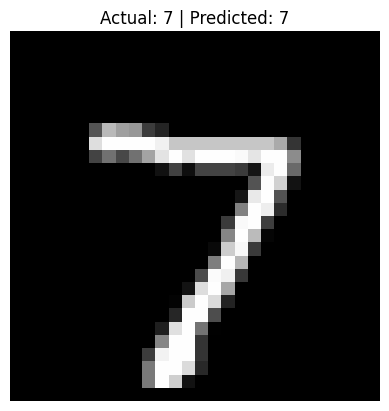

In [13]:
import matplotlib.pyplot as plt

plt.imshow(test_images[prediction_index], cmap='gray')
plt.title(f"Actual: {true_label} | Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [14]:
import pickle

filename = 'finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {filename}")


Model saved as finalized_model.pkl


In [15]:
loaded_model = None
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")



Model loaded successfully.


In [16]:
model.save('model.keras')


In [17]:
predicted_probabilities_2 = model.predict(test_images[88:88+1])
predicted_class_2 = np.argmax(predicted_probabilities_2)
true_label_2 = test_labels[88]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [18]:
print(f"\nTrue label for image : {true_label_2}")
print(f"Predicted label for image : {predicted_class_2}")



True label for image : 6
Predicted label for image : 6


In [19]:
# Convert model to TensorFlow Lite (Edge deployment format)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as model.tflite")


Saved artifact at '/tmp/tmpbt1n_5rw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132858072991696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132858072992656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132858072992080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132858072992464: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved as model.tflite


In [20]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open("model_quantized.tflite", "wb") as f:
    f.write(tflite_quant_model)

print("Quantized TFLite model saved")


Saved artifact at '/tmp/tmpl0aizojn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132858072991696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132858072992656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132858072992080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132858072992464: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized TFLite model saved
